In [40]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
dataFolder = '/work/group/egodat/reu23_clark/data'
LODESYear = '19'

In [4]:
#Load orgin-destination data (loops through each state)

if os.path.exists(dataFolder + "/od_data_combined" + LODESYear + ".pkl"):
    print("Loading cached file...")
    odData = pd.read_pickle(dataFolder + "/od_data_combined" + LODESYear + ".pkl")
else:
    stateData = []

    for path in glob.glob(dataFolder + "/LODES" + LODESYear + "/*_od_main_JT00_20*.csv"):
        print(".", end="")
        odData = pd.read_csv(path)
        odData = odData[['w_geocode', 'h_geocode', 'S000']]
        stateData.append(odData)

    odData = pd.concat(stateData)
    odData.to_pickle(dataFolder + "/od_data_combined" + LODESYear + ".pkl")
    odData
#.................................................

Loading cached file...


In [5]:
tracts = geopandas.read_file("cb_2019_us_tract_500k/cb_2019_us_tract_500k.shp").to_crs(3857)

In [33]:
def plotUS():
    ax = tracts.plot(figsize=(50, 50))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [7]:
tracts

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,34,005,702808,1400000US34005702808,34005702808,7028.08,CT,1510553,0,"POLYGON ((-8338721.991 4870666.343, -8338382.4..."
1,39,153,504200,1400000US39153504200,39153504200,5042,CT,808151,0,"POLYGON ((-9074549.502 5021131.869, -9074547.3..."
2,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-8240120.233 5085305.101, -8240069.4..."
3,06,013,370000,1400000US06013370000,06013370000,3700,CT,999356,0,"POLYGON ((-13617376.377 4570250.737, -13617279..."
4,48,113,019204,1400000US48113019204,48113019204,192.04,CT,2851229,9966,"POLYGON ((-10772278.627 3888211.000, -10772274..."
...,...,...,...,...,...,...,...,...,...,...
73863,48,245,011303,1400000US48245011303,48245011303,113.03,CT,155358411,14272444,"POLYGON ((-10495595.098 3488144.266, -10493231..."
73864,01,073,012302,1400000US01073012302,01073012302,123.02,CT,168942340,1269965,"POLYGON ((-9702934.672 3960941.092, -9702813.0..."
73865,72,113,072400,1400000US72113072400,72113072400,724,CT,11230767,184996,"POLYGON ((-7411905.227 2042155.812, -7411848.8..."
73866,06,081,608023,1400000US06081608023,06081608023,6080.23,CT,805954,119028,"POLYGON ((-13612033.557 4515439.007, -13611690..."


In [8]:
# tracts["STATEFP"].astype(float)
# tracts["COUNTYFP"].astype(float)
# tracts["TRACTCE"].astype(float)

In [9]:
tracts["BGRP"] = tracts["STATEFP"] + tracts["COUNTYFP"] + tracts["TRACTCE"]

In [10]:
tracts["BGRP"] = tracts["BGRP"].astype(float)

In [11]:
odData["w_bgrp"] = odData["w_geocode"]//10000

In [12]:
tracts

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,BGRP
0,34,005,702808,1400000US34005702808,34005702808,7028.08,CT,1510553,0,"POLYGON ((-8338721.991 4870666.343, -8338382.4...",3.400570e+10
1,39,153,504200,1400000US39153504200,39153504200,5042,CT,808151,0,"POLYGON ((-9074549.502 5021131.869, -9074547.3...",3.915350e+10
2,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-8240120.233 5085305.101, -8240069.4...",3.607100e+10
3,06,013,370000,1400000US06013370000,06013370000,3700,CT,999356,0,"POLYGON ((-13617376.377 4570250.737, -13617279...",6.013370e+09
4,48,113,019204,1400000US48113019204,48113019204,192.04,CT,2851229,9966,"POLYGON ((-10772278.627 3888211.000, -10772274...",4.811302e+10
...,...,...,...,...,...,...,...,...,...,...,...
73863,48,245,011303,1400000US48245011303,48245011303,113.03,CT,155358411,14272444,"POLYGON ((-10495595.098 3488144.266, -10493231...",4.824501e+10
73864,01,073,012302,1400000US01073012302,01073012302,123.02,CT,168942340,1269965,"POLYGON ((-9702934.672 3960941.092, -9702813.0...",1.073012e+09
73865,72,113,072400,1400000US72113072400,72113072400,724,CT,11230767,184996,"POLYGON ((-7411905.227 2042155.812, -7411848.8...",7.211307e+10
73866,06,081,608023,1400000US06081608023,06081608023,6080.23,CT,805954,119028,"POLYGON ((-13612033.557 4515439.007, -13611690...",6.081608e+09


In [19]:
odData
workingPop = odData.groupby(['w_bgrp']).sum()[['S000']]

In [20]:
workingPop

,S000
w_bgrp,
1001020100,211.0
1001020200,1560.0
1001020300,709.0
1001020400,667.0
1001020501,1640.0
...,...
56043000200,599.0
56043000301,1361.0
56043000302,1434.0


In [21]:
gdf = pd.merge(tracts, workingPop, left_on='BGRP', right_on='w_bgrp')

In [28]:
gdf2 = gdf[gdf["S000"] < 100000]

<AxesSubplot:>

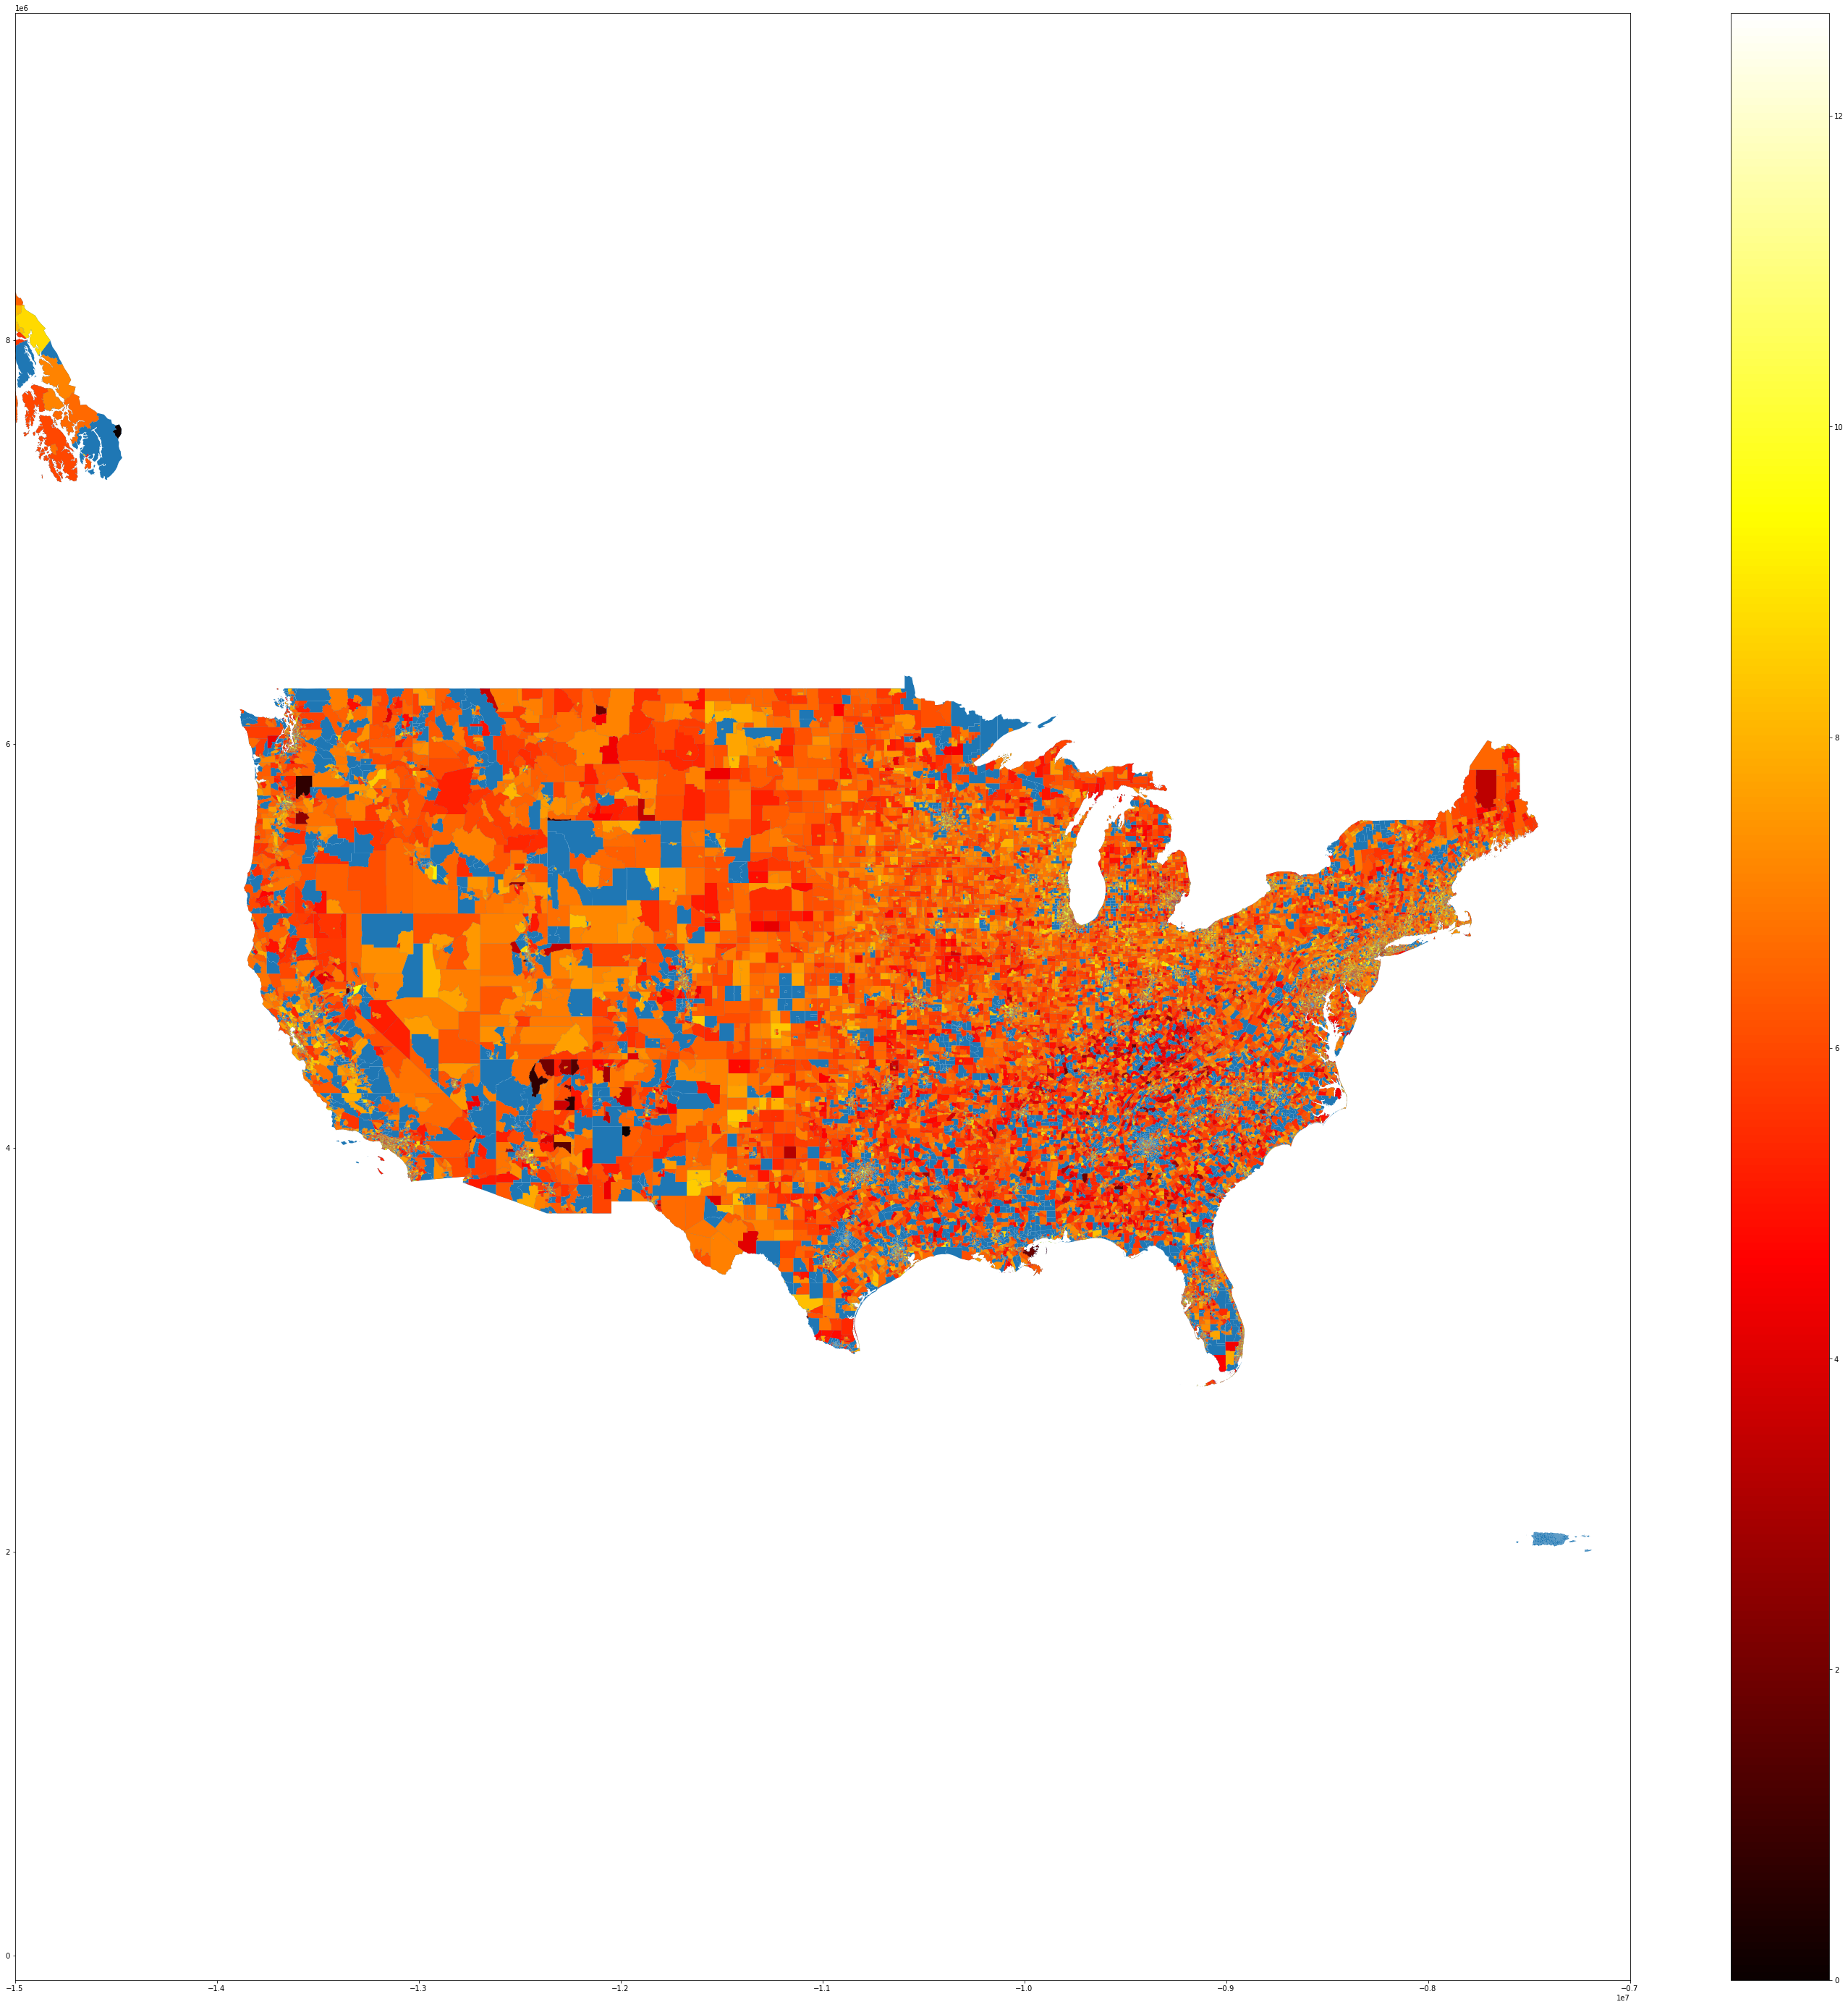

In [42]:
ax = plotUS()
gdf.plot(ax=ax, column='log', legend=True, cmap="hot")

In [35]:
gdf3 = gdf[gdf["S000"] > 1000]

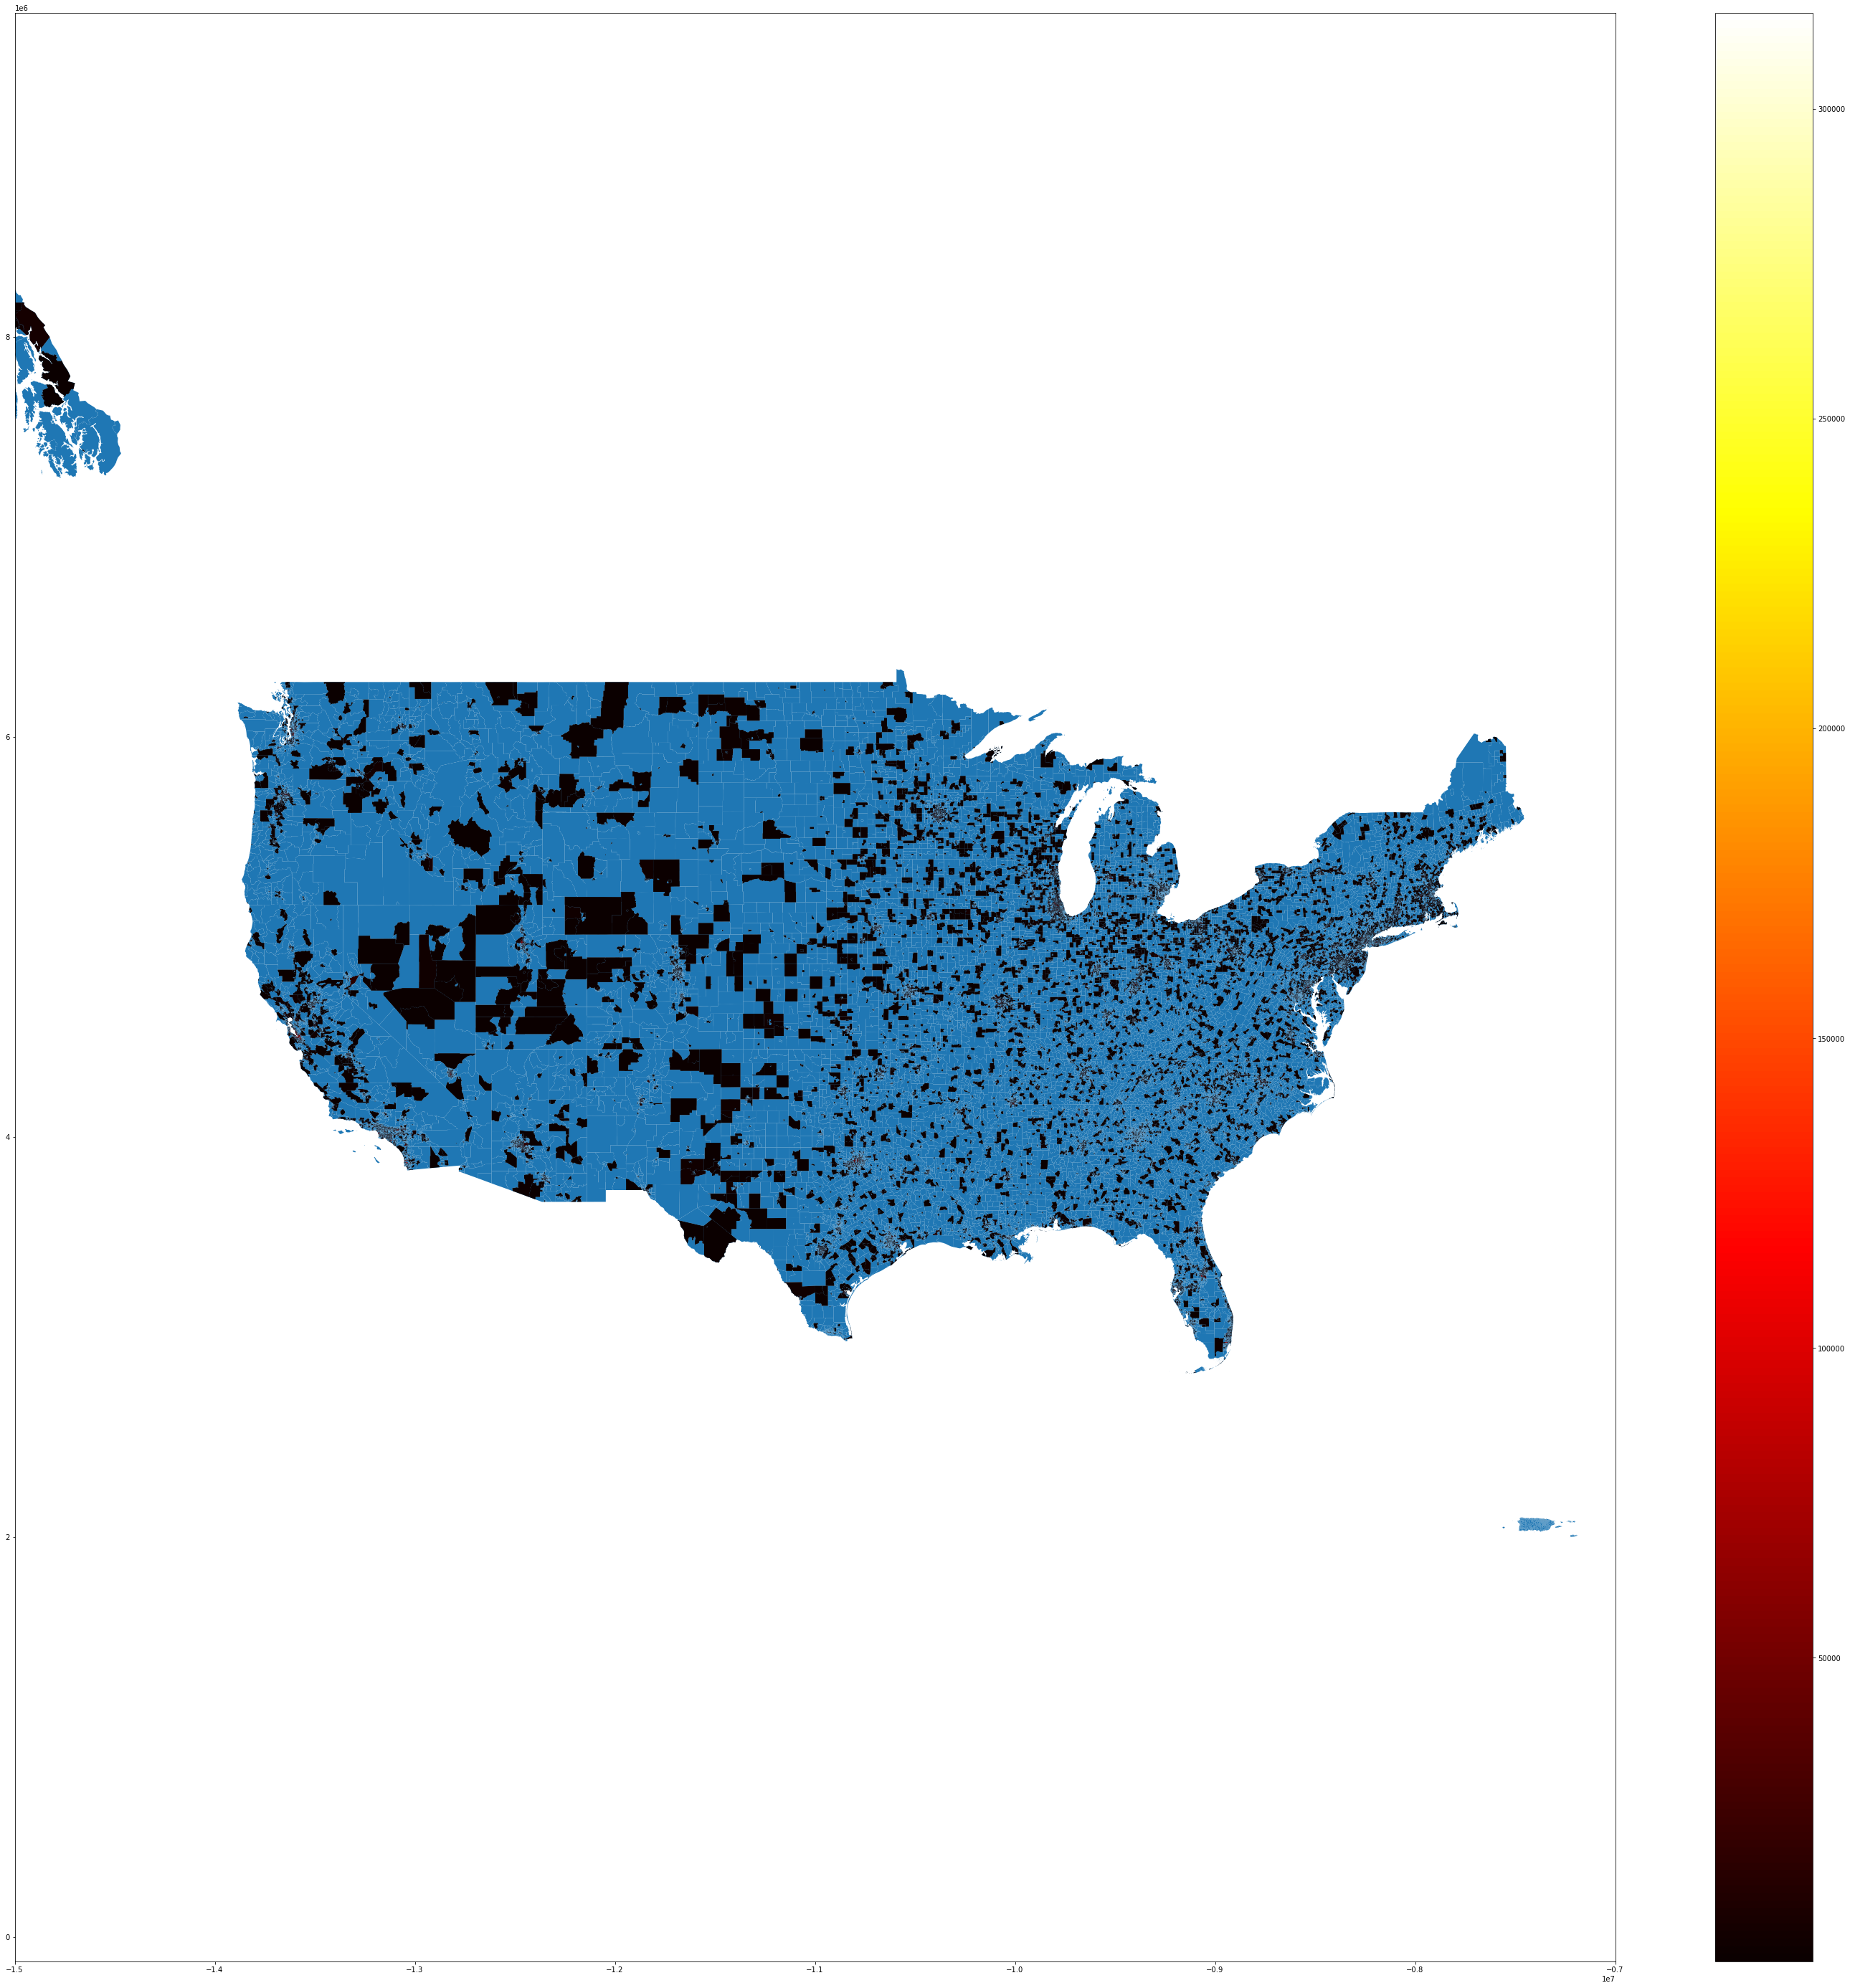

In [36]:
ax = plotUS()
gdf3.plot(ax=ax, column='S000', legend=True, cmap="hot")
plt.savefig("USmap.png")

In [41]:
gdf['log'] = np.log(gdf['S000'])